### Let's Start
<font color = "blue">
We will examine the notorious Titanic!

<font color = "red">

Content:

##### [load and check data](#1)
##### [Variable description](#2)
##### [Univariate variable analysis](#3)
###### ---- [Numerical variable analysis](#4)
###### ---- [Categorical variable analysis](#5)
##### [Basic data analysis](#6)
##### [Outlier Detection](#7)
##### [Missing Values](#8)
###### ---- [Find Missing Valued](#9)
###### ---- [Fill Missing Values](#10)
##### [Visualization](#11)
##### [Fill Missing Age Values](#12)
##### [Feature Engineering](#12)








<a id = "1"></a><br>
##### Load and Check data

In [136]:
# importing essencial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [137]:
train_df = pd.read_csv("../datas/train.csv")
test_df = pd.read_csv("../datas/test.csv")

In [138]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [139]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [140]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
##### Variable description
PassengerId: unique id of passengers

Survived: if the passenger survived or not

Pclass: class of the passenger

Name: name of the passenger

Sex: sex of the passenger

Age: age of the passenger

SibSp: the number of siblings that passenger have

Parch: the number of parents/children of that passenger have

Ticket: ticket number of passenger

Fare: ticket price which is bought by passenger

Cabin: Cabin number of passenger

Embarked: gate that passenger embarked

In [141]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [142]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id = "3"></a><br>
##### Univariate variable analysis

In [143]:
def bar_plot(column):
    var = train_df[column]
    var_value = var.value_counts()
    print(f"{column}, {var_value}")

    plt.figure(figsize = (8,5)) 
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.index.values)
    plt.ylabel("Number")
    plt.title(column)
    plt.show()
    print("\n \n \n")

def histogram_plot(column):
    var = train_df[column]
    var_value = var.value_counts()
    print(f"{column}, {var_value}")

    plt.figure(figsize = (8,5))
    plt.hist(var)
    plt.xlabel(column)
    plt.ylabel("Number")
    plt.title(f"{column} distrubiton with histogram")
    plt.show()
    print("\n \n \n")
    

<a id = "4"></a><br>
Numerical variable analysis

Fare, Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64


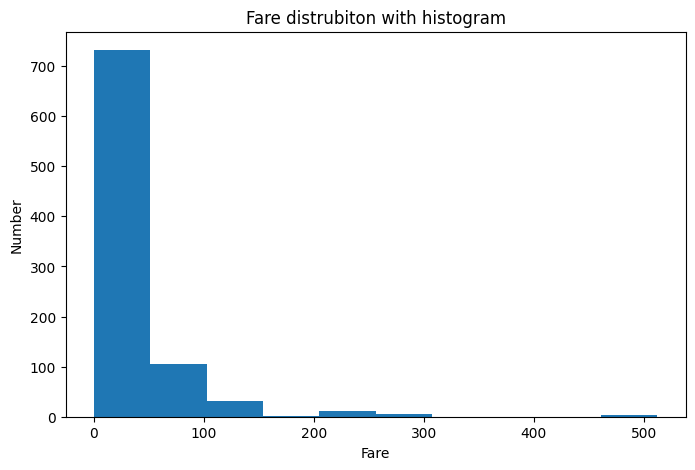


 
 

Age, Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64


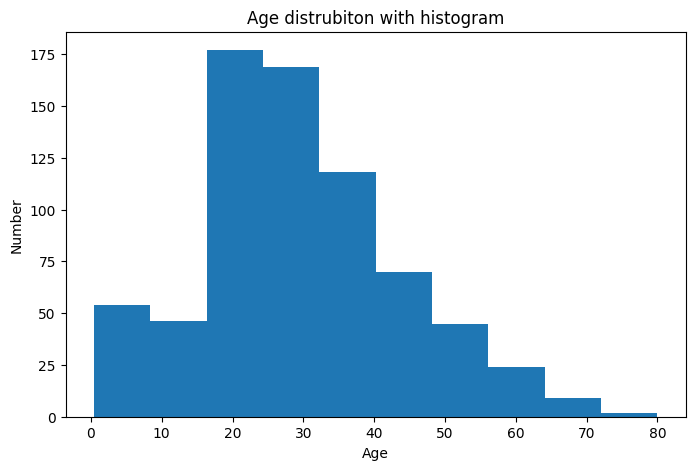


 
 

PassengerId, PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64


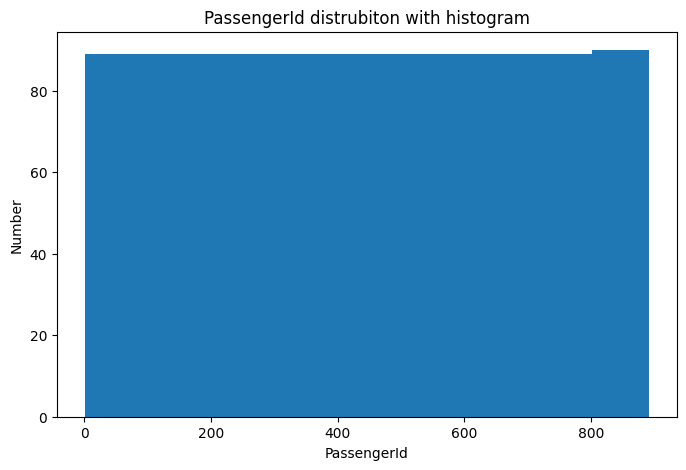

In [144]:
numericals = ["Fare", "Age", "PassengerId"]


for i in numericals:
    histogram_plot(i)

<a id = "5"></a><br>
Categorical variable analysis

Survived, Survived
0    549
1    342
Name: count, dtype: int64


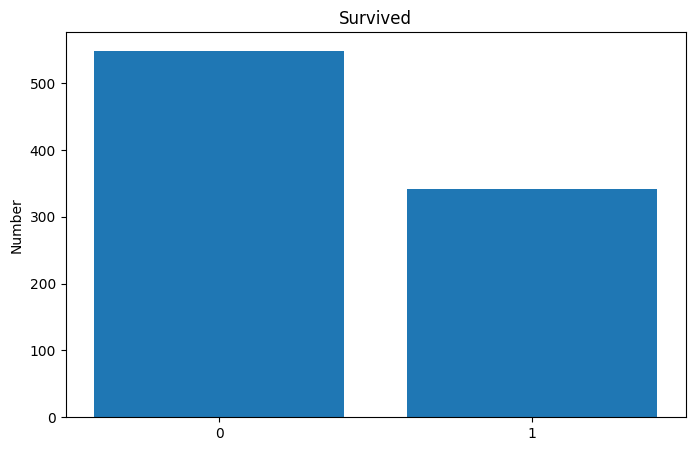


 
 

Sex, Sex
male      577
female    314
Name: count, dtype: int64


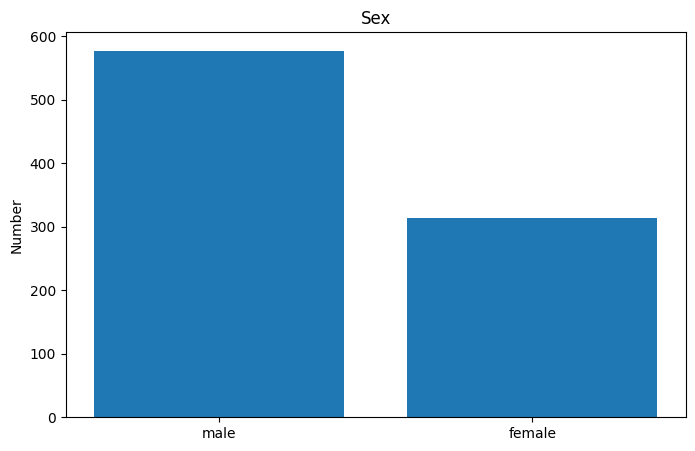


 
 

Pclass, Pclass
3    491
1    216
2    184
Name: count, dtype: int64


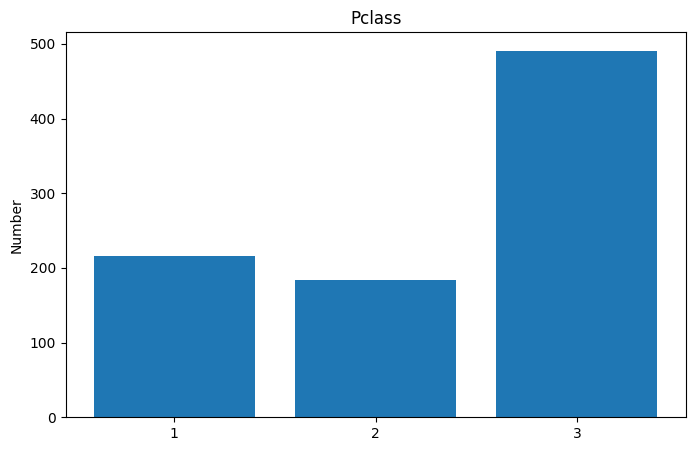


 
 

Embarked, Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


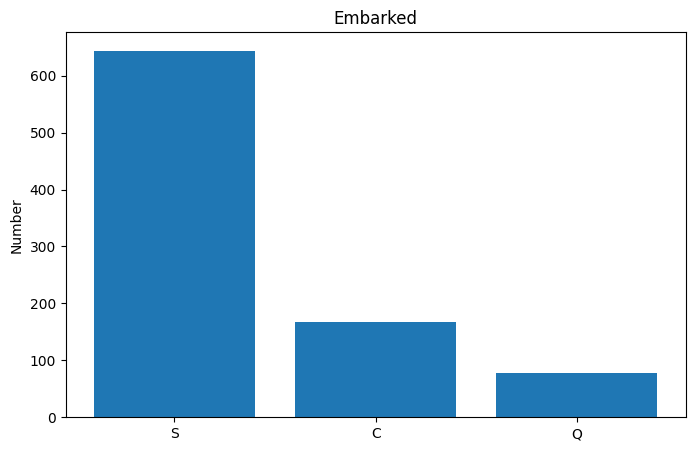


 
 

SibSp, SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


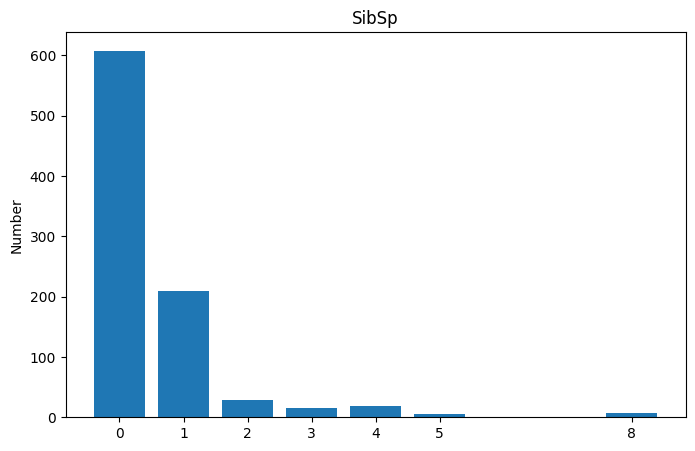


 
 

Parch, Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


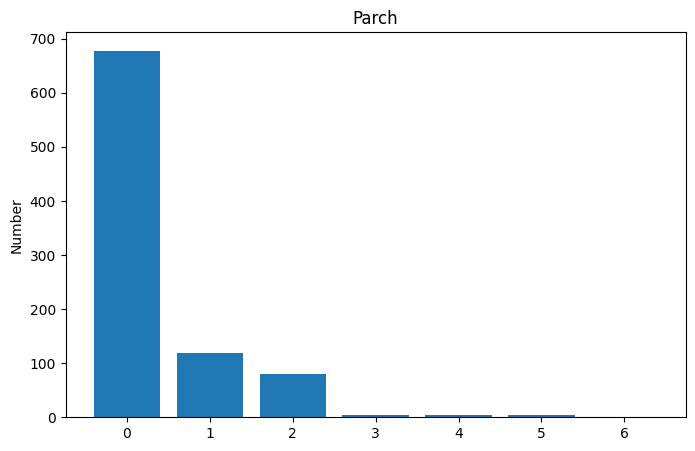

In [145]:
categoricals = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]

for i in categoricals:
    bar_plot(i)

<a id = "6"></a><br>
##### Basic data analysis

In [146]:
train_df[["Age", "Survived"]].groupby(["Age"], as_index = False).mean()

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [147]:
train_df[["Survived", "Sex"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [148]:
train_df[["Survived", "Pclass"]].groupby("Pclass", as_index = False).mean().sort_values(by = "Survived")

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


<a id = "7"></a><br>
##### Outlier Detection

In [149]:
def outlier_detector(df, features):
    outlier_indices = []

    for feature in features:
        #Q1
        q1 = np.percentile(df[feature], 25)

        #Q2
        q3 = np.percentile(df[feature], 75)

        #IQR
        iqr = q3 - q1

        outlier_list = df[(df[feature] < q1 - (iqr * 1.5) )| (df[feature] > q3 + (iqr * 1.5))].index

        outlier_indices.extend(outlier_list)

    outlier_indices = Counter(outlier_indices)

    multiple_outliers = list(feature for feature, count in outlier_indices.items() if count > 2 )

    return multiple_outliers





In [150]:
outlier_df = train_df.loc[outlier_detector(train_df, ["Age", "SibSp", "Parch", "Fare"])]

In [151]:
outlier_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [152]:
train_df_without_outlier = train_df.drop(index = outlier_df.index, axis = 0).reset_index(drop = True)

In [153]:
train_df_without_outlier

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
877,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
879,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id = "8"></a><br>
##### Outlier Detection

In [154]:
full_df = pd.concat([train_df, test_df], axis = 0).reset_index(drop= True)

<a id = "9"></a><br>
Find Missing Values

In [155]:
full_df.columns[full_df.isnull().any()] # These columns consist of some null values

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [156]:
full_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [157]:
full_df[full_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<a id = "10"></a><br>
Fill Missing Values

<Figure size 900x600 with 0 Axes>

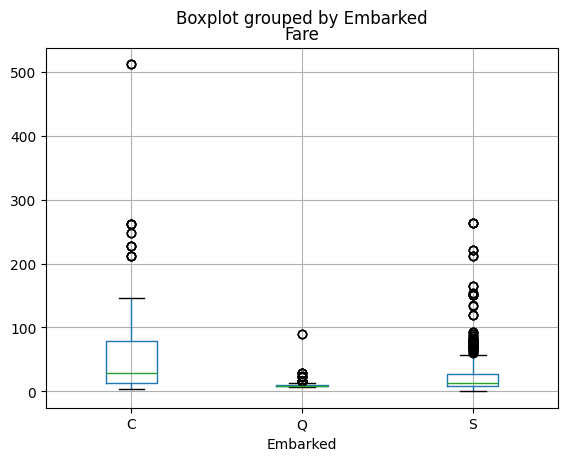

In [158]:
plt.figure(figsize=(9,6))
full_df.boxplot(column="Fare", by="Embarked")
plt.show()

In [159]:
full_df["Embarked"] = full_df["Embarked"].fillna("C")

In [160]:
full_df[full_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [161]:
full_df[full_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [162]:
np.mean(full_df[full_df["Pclass"] == 3]["Fare"])

np.float64(13.302888700564973)

In [163]:
full_df["Fare"] = full_df["Fare"].fillna(np.mean(full_df[full_df["Pclass"] == 3]["Fare"]))

In [164]:
full_df[full_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"></a><br>
Visualization

In [165]:
import seaborn as sns
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

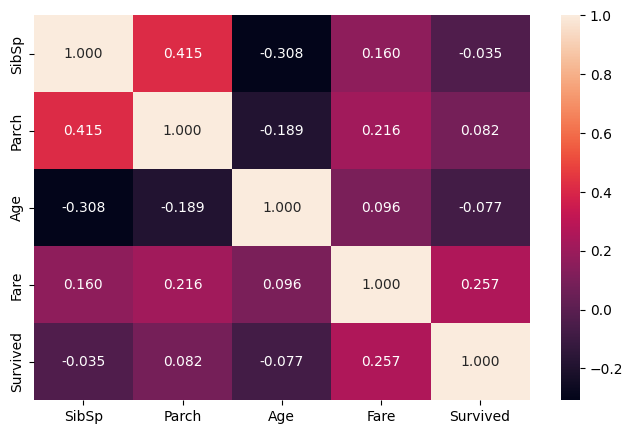

In [166]:
features = ["SibSp", "Parch", "Age", "Fare", "Survived"]
plt.figure(figsize=(8,5))
sns.heatmap(train_df[features].corr(), annot=True, fmt=".3f")
plt.show()

SibSp -- Survived relation

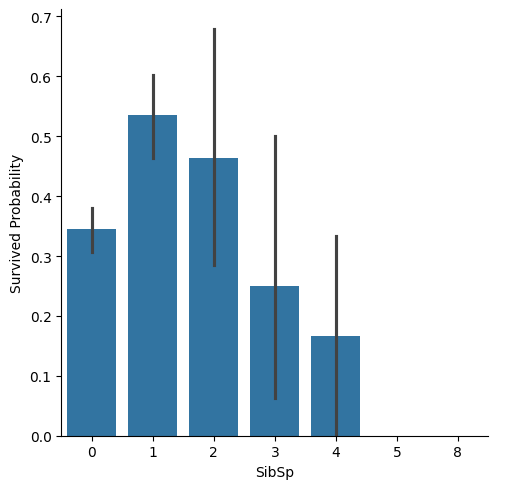

In [167]:
fig = sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar", height=5)
fig.set_ylabels("Survived Probability")
plt.show()

Parch -- Survived relation

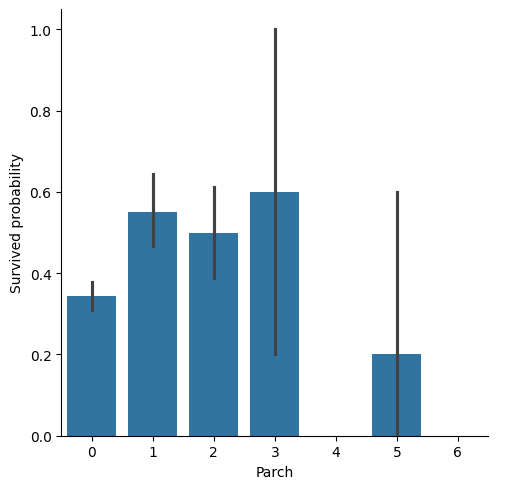

In [168]:
fig = sns.catplot(x="Parch", y="Survived", kind="bar", data=train_df, height=5)
fig.set_ylabels("Survived probability")
plt.show()

Pclass -- Survived relation

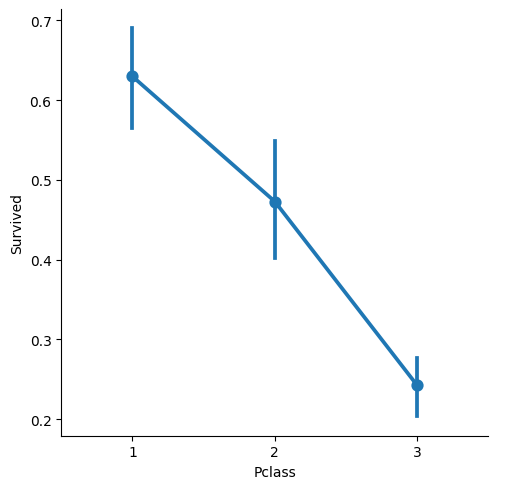

In [169]:
sns.catplot(x="Pclass", y="Survived", data=train_df, kind="point", height=5) #'strip', 'swarm', 'box', 'boxen', 'violin', 'bar', 'count', and 'point.
plt.show()

Age -- Survived relation

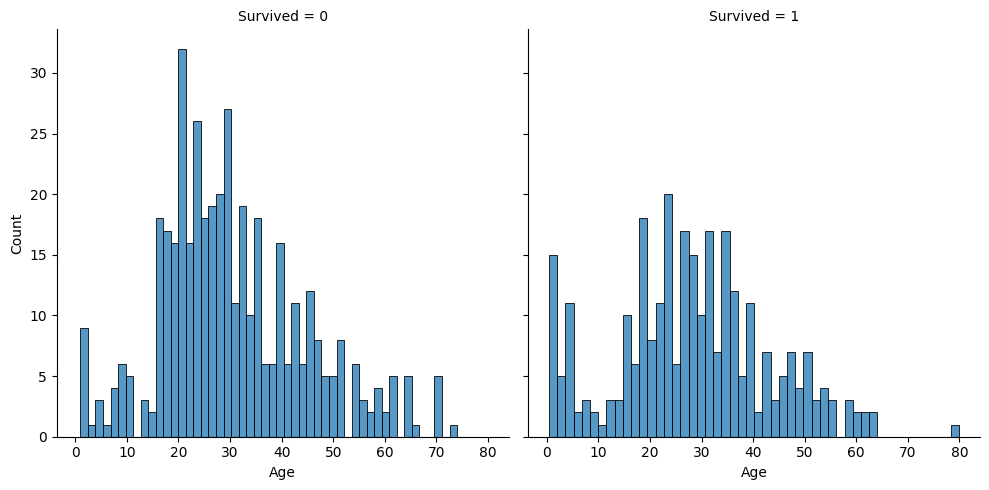

In [170]:
fig = sns.FacetGrid(train_df, col="Survived", height=5)
fig.map(sns.histplot, "Age", bins=50)
plt.show()

Pclass -- Survived -- Age relation

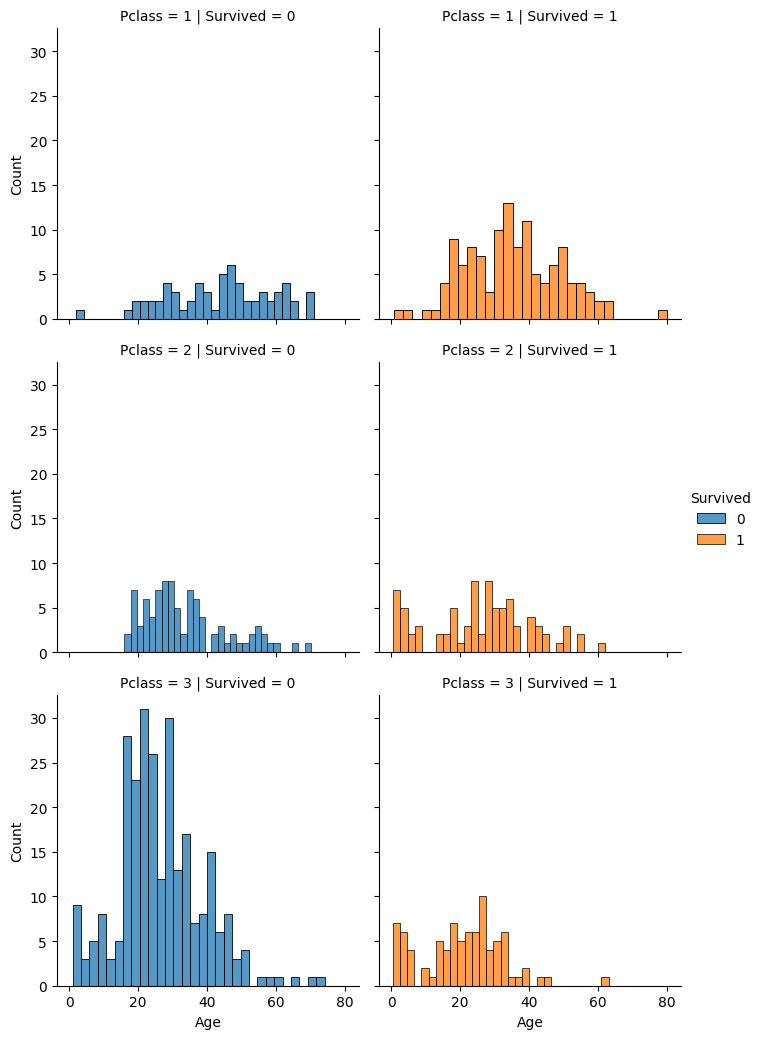

In [171]:
fig = sns.FacetGrid(data=train_df, col="Survived", row="Pclass", height=3.5, hue="Survived")
fig.map(sns.histplot, "Age", bins=30)
fig.add_legend()
plt.show()



Embarked -- Sex -- Pclass -- Survived

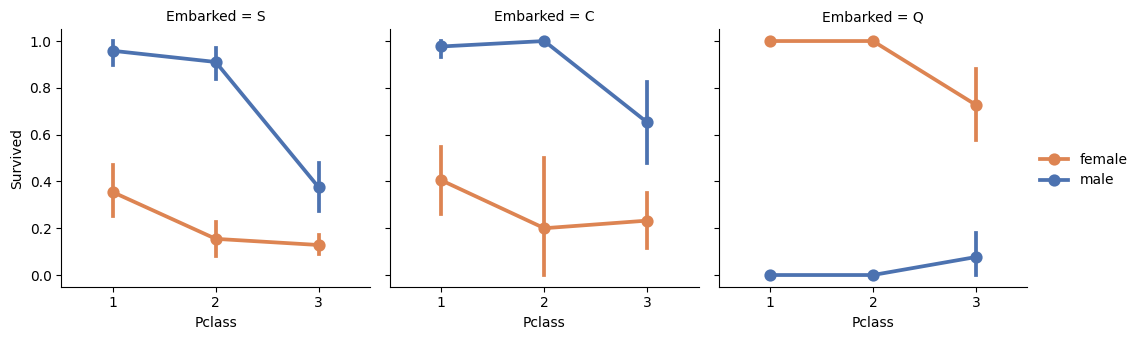

In [172]:
fig = sns.FacetGrid(data=train_df, col="Embarked", height=3.5)
fig.map_dataframe(sns.pointplot, x="Pclass", y="Survived", hue="Sex", palette="deep")
fig.add_legend()
plt.show()

Embarked -- Sex -- Fare -- Survived

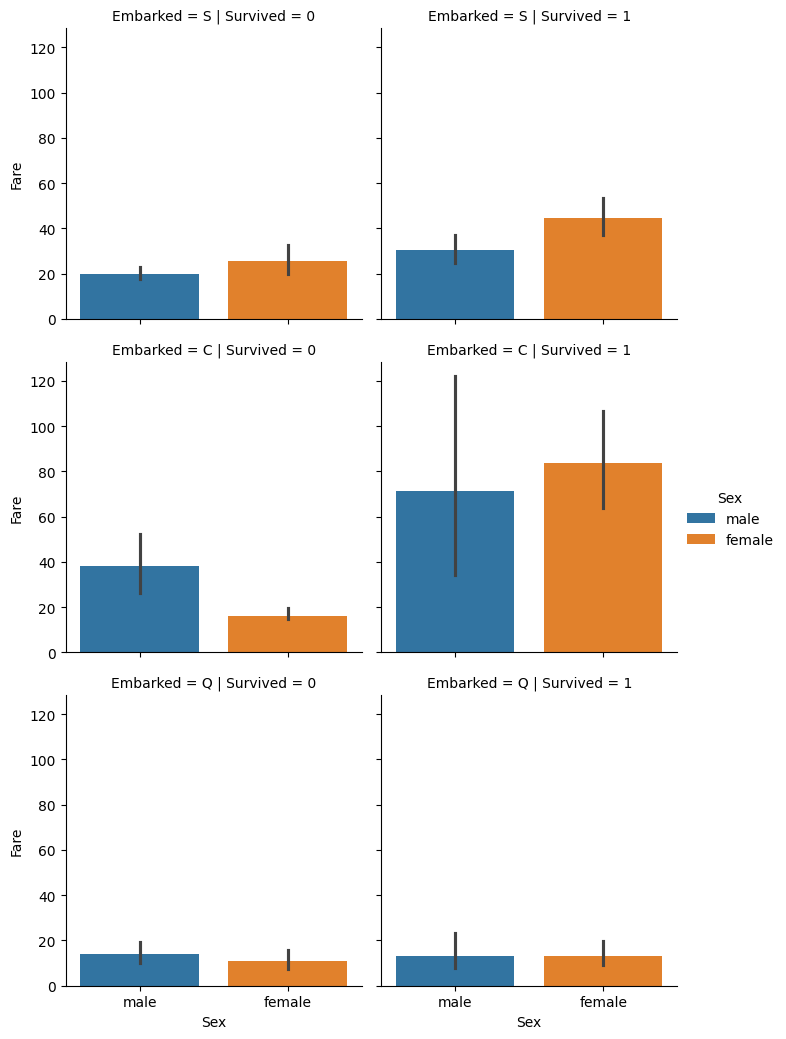

In [173]:
fig = sns.FacetGrid(data=train_df, row="Embarked", col="Survived", hue="Sex" ,height=3.5)
fig.map_dataframe(sns.barplot, x="Sex", y="Fare")
fig.add_legend()
plt.show()

<a id = "12"></a><br>
##### Filling None Age Values

In [174]:
full_df[full_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


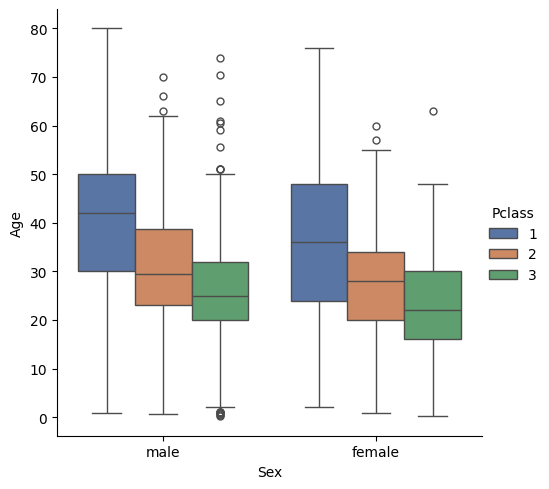

In [175]:
sns.catplot(x="Sex", y="Age", data=full_df, kind="box", hue="Pclass", palette="deep", height=5)
plt.show()

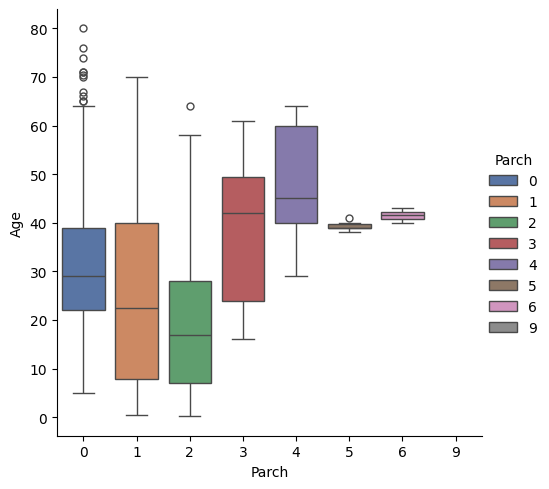

In [176]:
sns.catplot(data=full_df, x="Parch", y="Age", kind="box", height=5, hue="Parch", palette="deep")
plt.show()

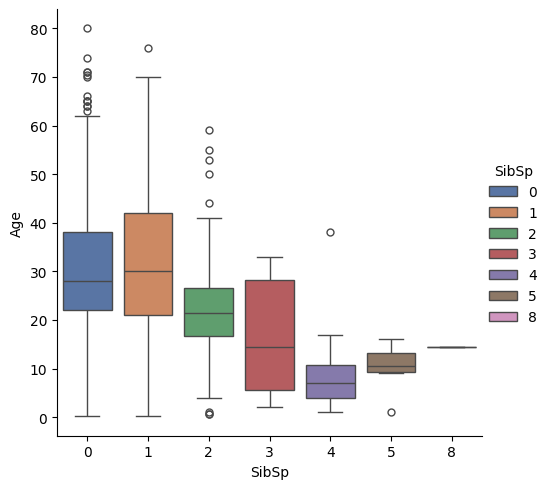

In [177]:
sns.catplot(data=full_df, x="SibSp", y="Age", hue="SibSp", height=5, palette="deep", kind="box")
plt.show()

In [178]:
full_df["Sex"] = [1 if i == "male" else 0 for i in full_df["Sex"]]
full_df[["Sex"]]

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
1304,1
1305,0
1306,1
1307,1


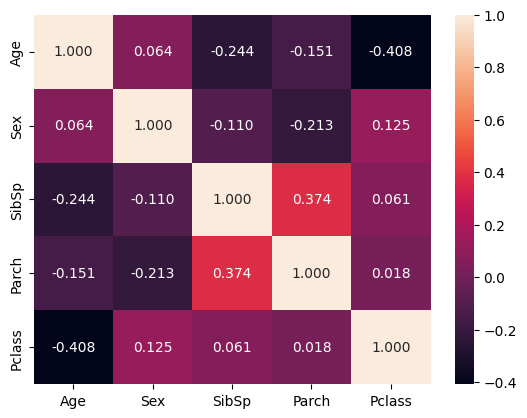

In [179]:
sns.heatmap(full_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot=True, fmt=".3f")
plt.show()

In [180]:
null_age_idx = list(full_df[full_df["Age"].isnull()].index)

for i in null_age_idx:
    sibsp = full_df.loc[i, "SibSp"]
    parch = full_df.loc[i, "Parch"]
    pclass = full_df.loc[i, "Pclass"]

    condition = (
        (full_df["SibSp"] == sibsp) &
        (full_df["Parch"] == parch) &
        (full_df["Pclass"] == pclass) &
        (full_df["Age"].notnull())
    )

    age_pred = full_df[condition]["Age"].median()

    if np.isnan(age_pred):
        full_df.loc[i, "Age"] = full_df["Age"].median()
    else:
        full_df.loc[i, "Age"] = age_pred


<a id = "13"></a><br>
##### Feature Engineering

Name -- Title

In [191]:
full_df[["Name"]].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [216]:
name=full_df["Name"]
full_df["Title"] = [i.split(".")[0].split(" ")[-1] for i in name]
full_df["Title"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [217]:
full_df[["Name", "Title"]].head(10)

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


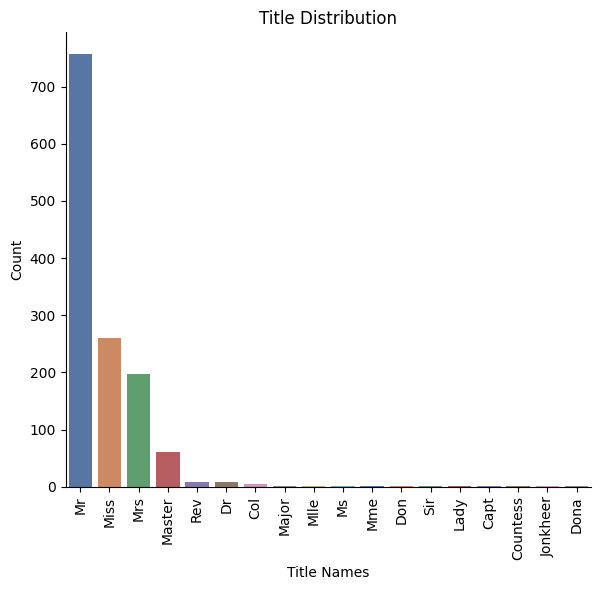

In [265]:
title_counts = full_df["Title"].value_counts().reset_index()
title_counts.columns = ["Title", "Count"]

sns.catplot(data=title_counts, x="Title", y="Count", kind="bar", height=6, hue="Title", palette="deep").add_legend()
plt.title("Title Distribution")
plt.xlabel("Title Names")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

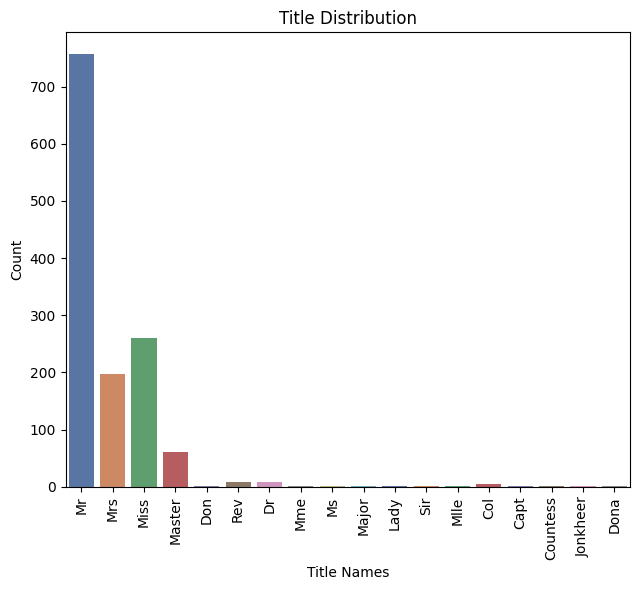

In [278]:
plt.figure(figsize=(6.5, 6.0))
sns.countplot(data=full_df, x="Title", hue="Title", palette="deep")
plt.title("Title Distribution")
plt.xlabel("Title Names")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()